In [33]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [34]:
#check the data 
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [35]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [36]:
#check descriptive statistics 
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [38]:
#number of null values for each column

null_counts = {}

for column in df.columns:
    null_counts[column] = df[column].isnull().sum()

sorted_null_counts = dict(sorted(null_counts.items(), key=lambda x: x[1], reverse=True))

for column, null_count in sorted_null_counts.items():

    print(f"'{column}' has {null_count} null values.")

'Population' has 652 null values.
'Hepatitis B' has 553 null values.
'GDP' has 448 null values.
'Total expenditure' has 226 null values.
'Alcohol' has 194 null values.
'Income composition of resources' has 167 null values.
'Schooling' has 163 null values.
' BMI ' has 34 null values.
' thinness  1-19 years' has 34 null values.
' thinness 5-9 years' has 34 null values.
'Polio' has 19 null values.
'Diphtheria ' has 19 null values.
'Life expectancy ' has 10 null values.
'Adult Mortality' has 10 null values.
'Country' has 0 null values.
'Year' has 0 null values.
'Status' has 0 null values.
'infant deaths' has 0 null values.
'percentage expenditure' has 0 null values.
'Measles ' has 0 null values.
'under-five deaths ' has 0 null values.
' HIV/AIDS' has 0 null values.


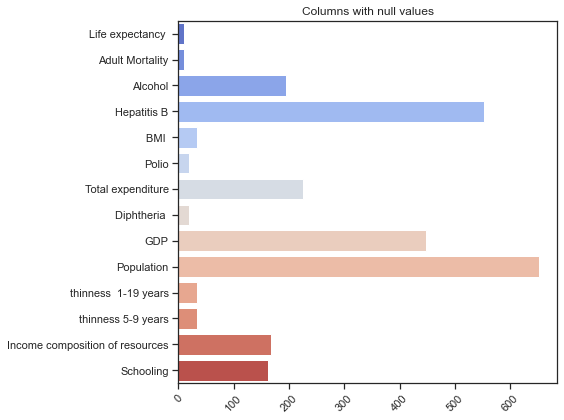

In [39]:
#Plot of the columns with null values
null_counts = df.isnull().sum() 

columns_with_nulls = null_counts[null_counts > 0]


plt.figure(figsize=(8, 6))
sns.barplot(x=columns_with_nulls.values, y=columns_with_nulls.index, palette='coolwarm')
plt.title('Columns with null values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [41]:
#Fill null values with the mean of the column (only to the columns with numerical values)

numeric_columns = df.select_dtypes(include=['number'])
column_means = numeric_columns.mean()

for column in df.columns[df.isnull().any()]:
    df[column].fillna(column_means[column], inplace=True)

In [42]:
#Check if the dataset has null values

null_counts = {}

for column in df.columns:
    null_counts[column] = df[column].isnull().sum()

sorted_null_counts = dict(sorted(null_counts.items(), key=lambda x: x[1], reverse=True))

for column, null_count in sorted_null_counts.items():

    print(f"'{column}' has {null_count} null values.")

'Country' has 0 null values.
'Year' has 0 null values.
'Status' has 0 null values.
'Life expectancy ' has 0 null values.
'Adult Mortality' has 0 null values.
'infant deaths' has 0 null values.
'Alcohol' has 0 null values.
'percentage expenditure' has 0 null values.
'Hepatitis B' has 0 null values.
'Measles ' has 0 null values.
' BMI ' has 0 null values.
'under-five deaths ' has 0 null values.
'Polio' has 0 null values.
'Total expenditure' has 0 null values.
'Diphtheria ' has 0 null values.
' HIV/AIDS' has 0 null values.
'GDP' has 0 null values.
'Population' has 0 null values.
' thinness  1-19 years' has 0 null values.
' thinness 5-9 years' has 0 null values.
'Income composition of resources' has 0 null values.
'Schooling' has 0 null values.


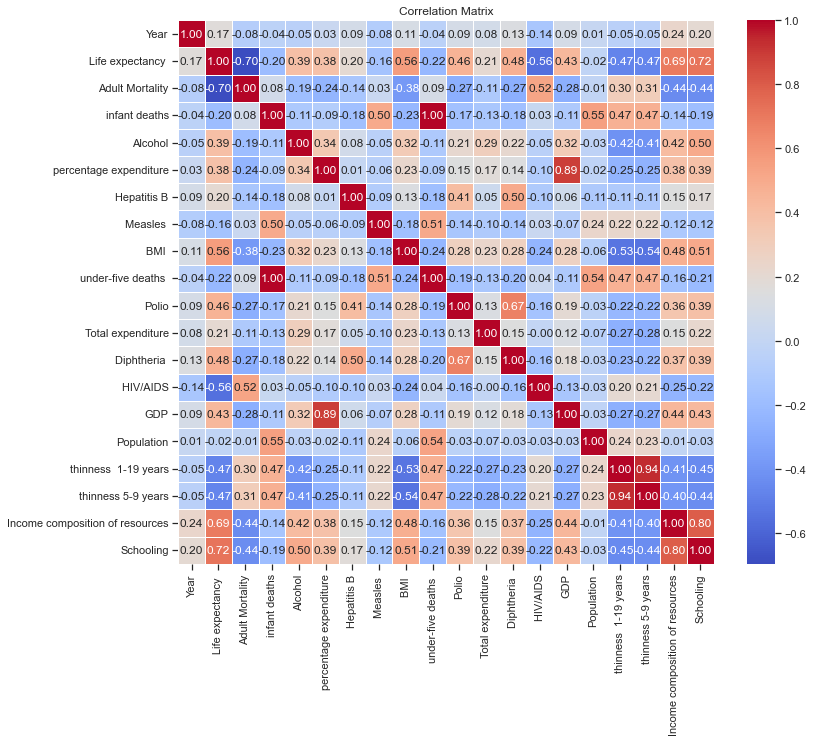

In [43]:
#Confusion matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

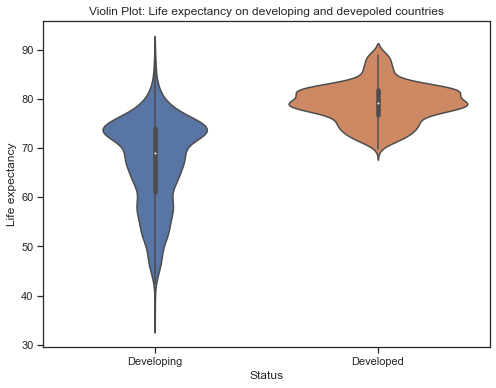

In [44]:
#Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Status", y="Life expectancy ", data=df)
plt.title("Violin Plot: Life expectancy on developing and devepoled countries")
plt.xlabel("Status")
plt.ylabel("Life expectancy")
plt.show()

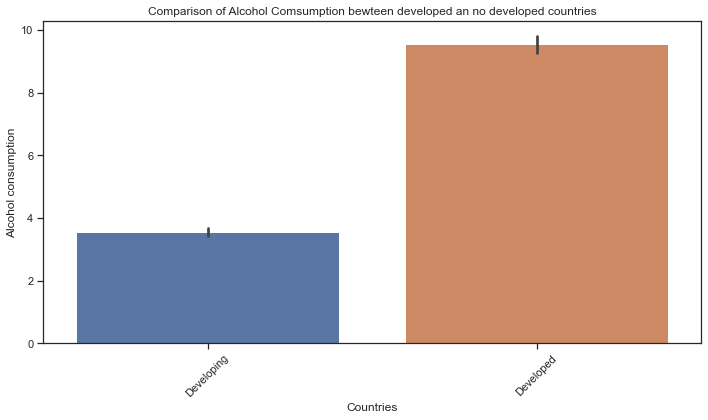

In [45]:
#Bar char to compare the consuption of alcohol

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='Status', y='Alcohol', data=df)

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Alcohol consumption')
plt.title('Comparison of Alcohol Comsumption bewteen developed an no developed countries')

# Displaying the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [46]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


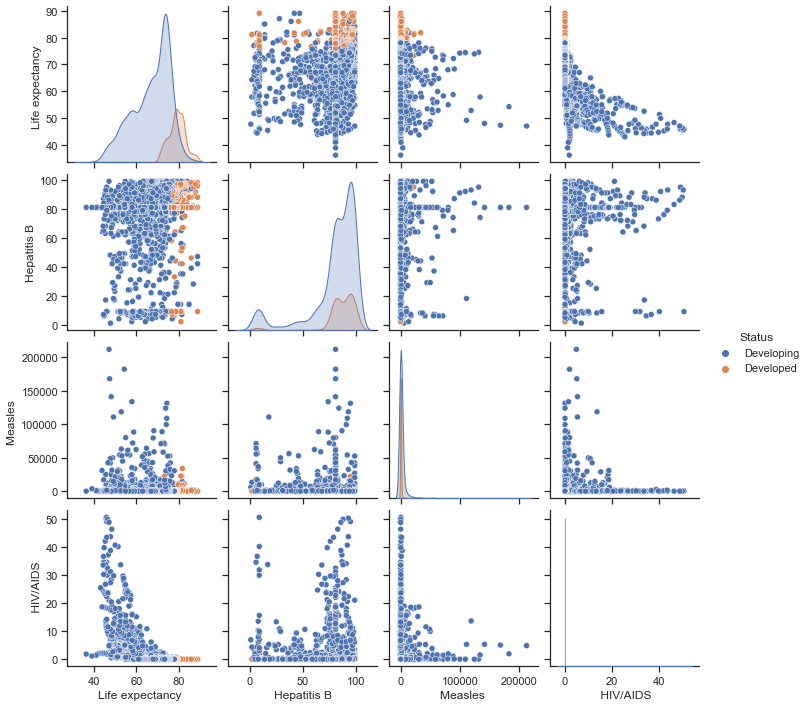

In [47]:
s_columns = ['Status', 'Life expectancy ', 'Hepatitis B', 'Measles ', ' HIV/AIDS']
sns.set_theme(style="ticks")

sns.pairplot(df[s_columns], hue='Status')
plt.show()

In [48]:
#Droping columns
df.drop(['Country','infant deaths','Year'], axis=1, inplace=True)


In [49]:
#One hot encode the status column
one_hot_encoded = pd.get_dummies(df['Status'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop(['Status'], axis=1, inplace=True)

In [50]:
df.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [51]:
#Split the data
X = df.drop(['Life expectancy '], axis=1)
y = df['Life expectancy ']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Create thhe linear model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse,2))
linear_model.score(X_test,y_test)

Mean Squared Error: 16.25


0.8124184451523002

In [53]:
rf=RandomForestRegressor()

random_forest=rf.fit(X_train,y_train)

y_forest_pred = random_forest.predict(X_test)
forest_mse = mean_squared_error(y_test, y_forest_pred)


print("Mean Squared Error Random Forest: ", round(forest_mse,2))
random_forest.score(X_test,y_test)

Mean Squared Error Random Forest:  2.87


0.9668538104170569